In [1]:
# ==============================================================================
# Step 1: Setup and Load Data
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the split and encoded datasets from the previous step
X_train = pd.read_csv('X_train_encoded.csv')
X_test = pd.read_csv('X_test_encoded.csv')
y_train = pd.read_csv('y_train.csv').squeeze()
y_test = pd.read_csv('y_test.csv').squeeze()

print("✅ Data files loaded successfully.")
print("Shape of training data before outlier removal:", X_train.shape)

✅ Data files loaded successfully.
Shape of training data before outlier removal: (22320, 16)


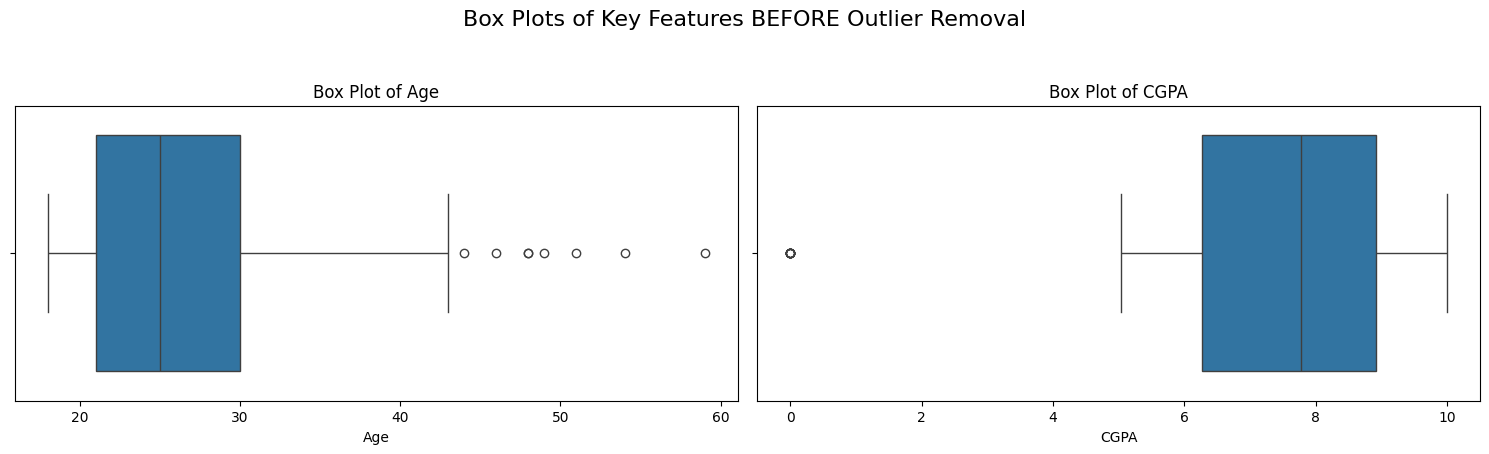

In [9]:
# ==============================================================================
# Step 2: EDA - Visualize Outliers with Box Plots (Before Removal)
# ==============================================================================
# Select key numerical features to inspect for outliers
# We only inspect the TRAINING data
features_to_check = ['Age', 'CGPA']

plt.figure(figsize=(15, 8))
plt.suptitle("Box Plots of Key Features BEFORE Outlier Removal", fontsize=16)

for i, feature in enumerate(features_to_check):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=X_train[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [5]:
# ==============================================================================
# Step 3: Identify and Remove Outliers from the Training Set
# ==============================================================================
print("\n--- Identifying and removing outliers from the training data only ---")

# Select only the numerical columns for IQR calculation
numerical_cols = X_train.select_dtypes(include=np.number).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = X_train[numerical_cols].quantile(0.25)
Q3 = X_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows that contain outliers in any of the numerical columns
outlier_mask = ((X_train[numerical_cols] < lower_bound) | (X_train[numerical_cols] > upper_bound)).any(axis=1)

# Get the indices of the outlier rows
outlier_indices = X_train[outlier_mask].index

print(f"Original number of samples in training data: {len(X_train)}")
print(f"Number of outliers detected: {len(outlier_indices)}")

# Remove the outliers from both X_train and y_train
X_train_cleaned = X_train.drop(outlier_indices)
y_train_cleaned = y_train.drop(outlier_indices)

print(f"New number of samples in training data: {len(X_train_cleaned)}")
print(f"Shape of X_test (unchanged): {X_test.shape}")


--- Identifying and removing outliers from the training data only ---
Original number of samples in training data: 22320
Number of outliers detected: 4909
New number of samples in training data: 17411
Shape of X_test (unchanged): (5581, 16)


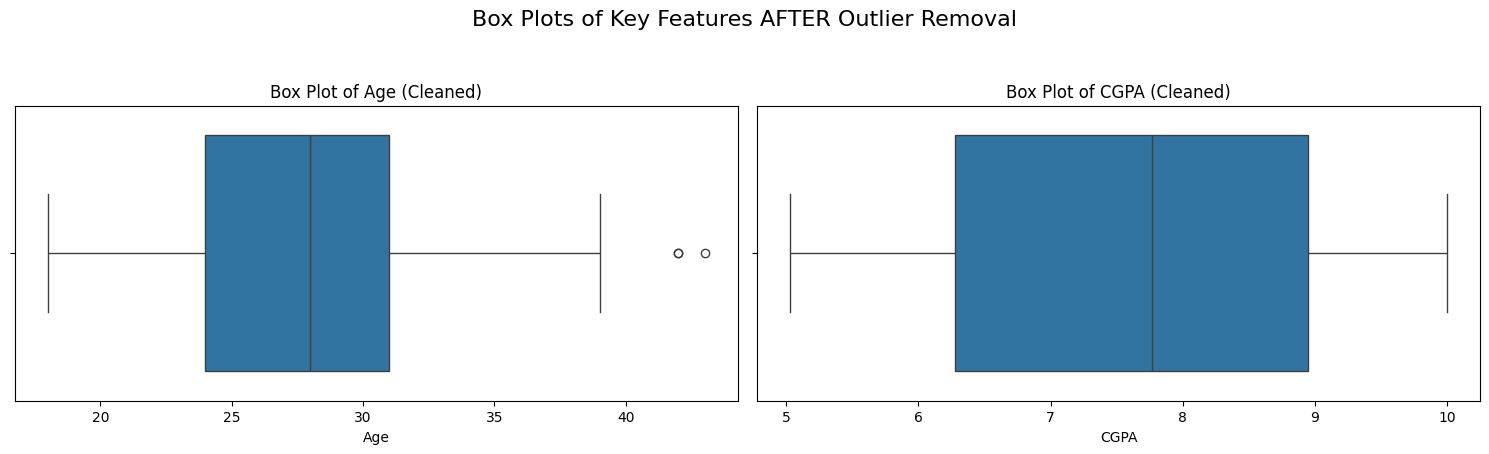

In [10]:
# ==============================================================================
# Step 4: EDA - Visualize Data with Box Plots (After Removal)
# ==============================================================================

plt.figure(figsize=(15, 8))
plt.suptitle("Box Plots of Key Features AFTER Outlier Removal", fontsize=16)

for i, feature in enumerate(features_to_check):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=X_train_cleaned[feature])
    plt.title(f'Box Plot of {feature} (Cleaned)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

This is because the box plot's boundaries are recalculated based on the new, tighter distribution of the cleaned data. These remaining points are not extreme and removing them further could risk deleting valuable data. Therefore, we made a conscious decision to perform only one pass of outlier removal to eliminate the most influential outliers while preserving the integrity of the dataset. The resulting data is now more robust for model training

In [11]:
# ==============================================================================
# Step 5: Save the Cleaned Data for the Next Handoff
# ==============================================================================

# Save the cleaned training data
X_train_cleaned.to_csv('X_train_no_outliers.csv', index=False)
y_train_cleaned.to_csv('y_train_no_outliers.csv', index=False)

# The original test data is passed along without changes
X_test.to_csv('X_test_original.csv', index=False)
y_test.to_csv('y_test_original.csv', index=False)

print("\n✅ Handoff successful! Cleaned training data and original test data have been saved.")


✅ Handoff successful! Cleaned training data and original test data have been saved.
